# Impors

In [3]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()

# 2.1. Square lattice

In [4]:
import pybinding as pb

d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0])  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t)
)

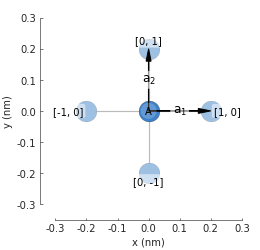

In [5]:
lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function

# 2.2. Graphene

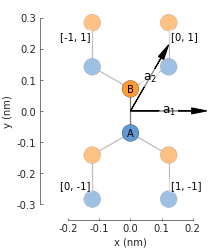

In [6]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

# 2.3. Brillouin zone

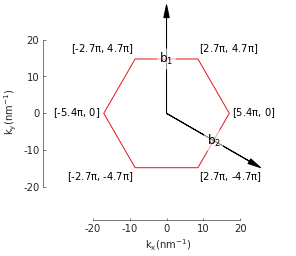

In [7]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

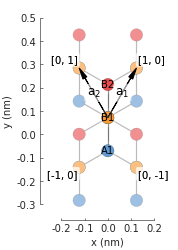

In [8]:
from pybinding.repository import graphene
lattice = graphene.bilayer()
lattice.plot()

# 2.6. Example

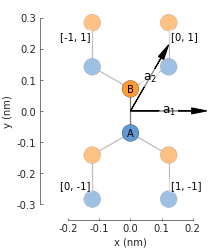

In [9]:
"""Create and plot a monolayer graphene lattice and it's Brillouin zone"""
import pybinding as pb
import matplotlib.pyplot as plt
from math import sqrt

pb.pltutils.use_style()


def monolayer_graphene():
    """Return the lattice specification for monolayer graphene"""
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    # create a lattice with 2 primitive vectors
    lat = pb.Lattice(
        a1=[a, 0],
        a2=[a/2, a/2 * sqrt(3)]
    )

    lat.add_sublattices(
        # name and position
        ('A', [0, -a_cc/2]),
        ('B', [0,  a_cc/2])
    )

    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )

    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()

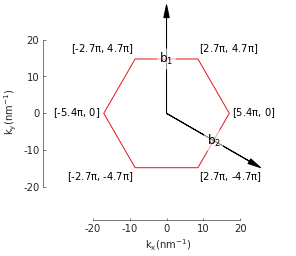

In [10]:
lattice.plot_brillouin_zone()
plt.show()

# 3.1. Model

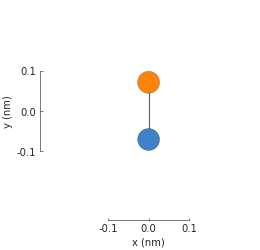

In [11]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

In [12]:
model.system.x

array([0., 0.], dtype=float32)

In [13]:
model.system.y

array([-0.071,  0.071], dtype=float32)

In [14]:
model.system.sublattices

AliasArray([0, 1], dtype=int32)

In [15]:
model.hamiltonian.todense()

matrix([[ 0. , -2.8],
        [-2.8,  0. ]], dtype=float32)

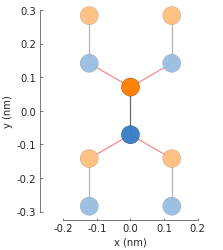

In [16]:
model = pb.Model(
    graphene.monolayer(),
    pb.translational_symmetry()
)
model.plot()

# 3.2. Solver

In [17]:
model = pb.Model(graphene.monolayer())

In [18]:
solver = pb.solver.lapack(model)

In [19]:
solver.eigenvectors

array([[-0.70710677, -0.70710677],
       [-0.70710677,  0.70710677]], dtype=float32)

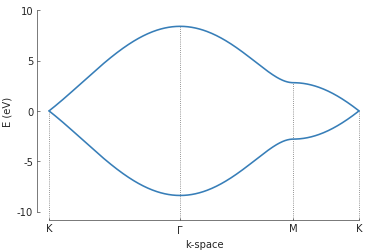

In [20]:
from math import sqrt, pi

model = pb.Model(graphene.monolayer(), pb.translational_symmetry())
solver = pb.solver.lapack(model)

a_cc = graphene.a_cc
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])

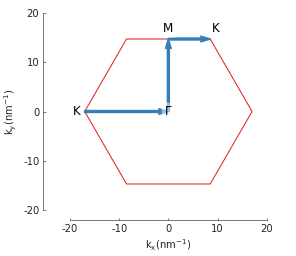

In [21]:
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=['K', r'$\Gamma$', 'M', 'K'])

# 3.3. Switching lattices

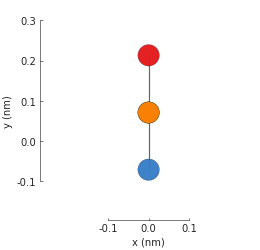

In [22]:
model = pb.Model(graphene.bilayer())
model.plot()

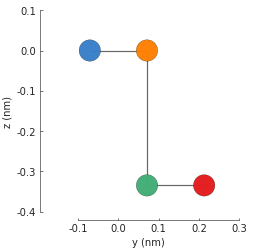

In [23]:
model = pb.Model(graphene.bilayer())
model.plot(axes='yz')

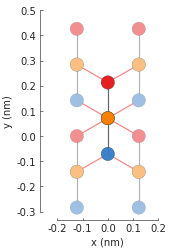

In [24]:
model = pb.Model(graphene.bilayer(), pb.translational_symmetry())
model.plot()

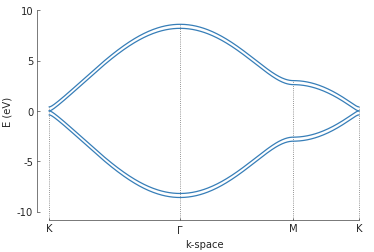

In [25]:
solver = pb.solver.lapack(model)
bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])

# 3.5. Example

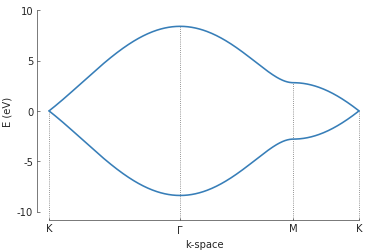

In [26]:
"""Calculate and plot the band structure of monolayer graphene"""
import pybinding as pb
import matplotlib.pyplot as plt
from math import sqrt, pi
from pybinding.repository import graphene

pb.pltutils.use_style()


model = pb.Model(
    graphene.monolayer(),  # predefined lattice from the material repository
    pb.translational_symmetry()    # creates an infinite sheet of graphene
)
solver = pb.solver.lapack(model)  # eigensolver from the LAPACK library

# significant points in graphene's Brillouin zone
a_cc = graphene.a_cc  # carbon-carbon distance
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

# plot the bands through the desired points
bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(point_labels=['K', r'$\Gamma$', 'M', 'K'])
plt.show()

## 4. Finite size

# 4.1. Primitive

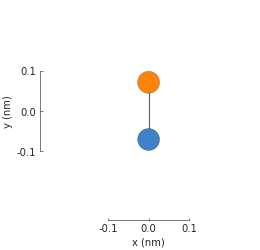

In [27]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

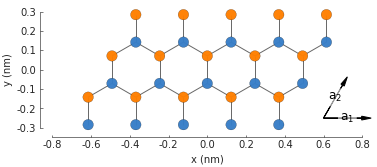

In [28]:
model = pb.Model(
    graphene.monolayer(),
    pb.primitive(a1=5, a2=3)
)
model.plot()
model.lattice.plot_vectors(position=[0.6, -0.25])

# 4.2. Polygon

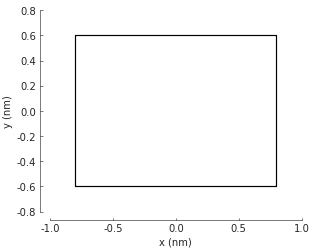

In [29]:
def rectangle(width, height):
    x0 = width / 2
    y0 = height / 2
    return pb.Polygon([[x0, y0], [x0, -y0], [-x0, -y0], [-x0, y0]])

shape = rectangle(1.6, 1.2)
shape.plot()

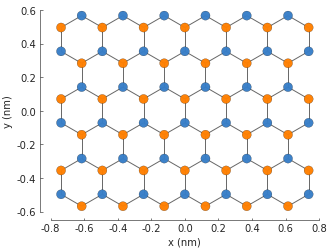

In [30]:
model = pb.Model(
    graphene.monolayer(),
    rectangle(width=1.6, height=1.2)
)
model.plot()

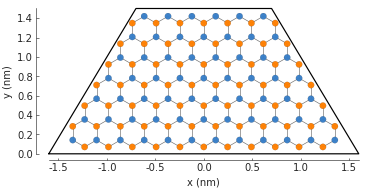

In [31]:
def trapezoid(a, b, h):
    return pb.Polygon([[-a/2, 0], [-b/2, h], [b/2, h], [a/2, 0]])

model = pb.Model(
    graphene.monolayer(),
    trapezoid(a=3.2, b=1.4, h=1.5)
)
model.plot()
model.shape.plot()

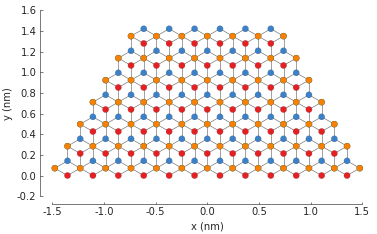

In [32]:
model = pb.Model(
    graphene.bilayer(),
    trapezoid(a=3.2, b=1.4, h=1.5)
)
model.plot()

# 4.3. Freeform shape

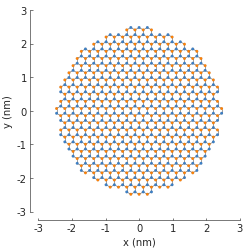

In [33]:
def circle(radius):
    def contains(x, y, z):
        return np.sqrt(x**2 + y**2) < radius
    return pb.FreeformShape(contains, width=[2*radius, 2*radius])

model = pb.Model(
    graphene.monolayer(),
    circle(radius=2.5)
)
model.plot()

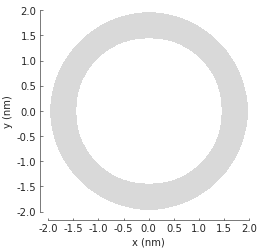

In [34]:
def ring(inner_radius, outer_radius):
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)
    return pb.FreeformShape(contains, width=[2*outer_radius, 2*outer_radius])

shape = ring(inner_radius=1.4, outer_radius=2)
shape.plot()

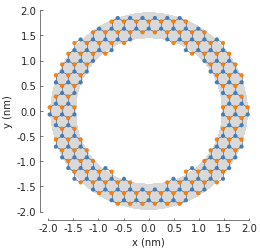

In [35]:
model = pb.Model(
    graphene.monolayer(),
    ring(inner_radius=1.4, outer_radius=2)
)
model.plot()
model.shape.plot()

In [36]:
    x = np.array([7, 2, 3, 5, 1])

In [37]:
x<5

array([False,  True,  True, False,  True])

In [38]:
2 < x and x < 5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
 np.logical_and(2 < x, x < 5)

# 4.4. Composite shape

In [ ]:
# Simple shapes
rectangle = pb.rectangle(x=6, y=1)
hexagon = pb.regular_polygon(num_sides=6, radius=1.92, angle=np.pi/6)
circle = pb.circle(radius=0.6)

# Compose them naturally
shape = rectangle + hexagon - circle

model = pb.Model(graphene.monolayer(), shape)
model.shape.plot()
model.plot()

# 4.5. Spatial LDOS

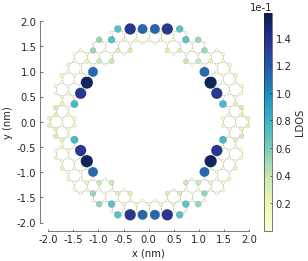

In [39]:
model = pb.Model(
    graphene.monolayer(),
    ring(inner_radius=1.4, outer_radius=2)
)
solver = pb.solver.arpack(model, k=20)  # only the 20 lowest eigenstates

ldos = solver.calc_spatial_ldos(energy=0, broadening=0.05)  # eV
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")

# 4.7. Example

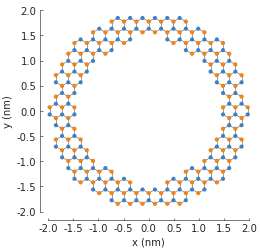

In [40]:
"""Model a graphene ring structure and calculate the local density of states"""
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene

pb.pltutils.use_style()


def ring(inner_radius, outer_radius):
    """A simple ring shape"""
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)

    return pb.FreeformShape(contains, width=[2 * outer_radius, 2 * outer_radius])


model = pb.Model(
    graphene.monolayer(),
    ring(inner_radius=1.4, outer_radius=2)  # length in nanometers
)

model.plot()
plt.show()

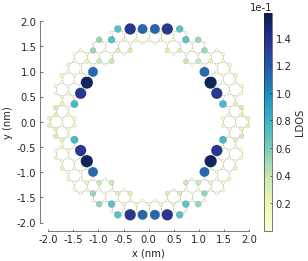

In [41]:
# only solve for the 20 lowest energy eigenvalues
solver = pb.solver.arpack(model, k=20)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.05)  # LDOS around 0 eV
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

# 5. Shape and symmetry

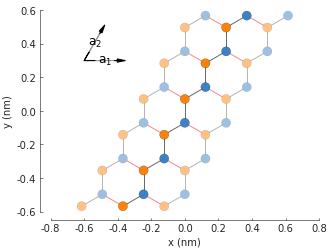

In [42]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),  # nm
    pb.translational_symmetry(a1=True, a2=False)
)
model.plot()
model.lattice.plot_vectors(position=[-0.6, 0.3])  # nm

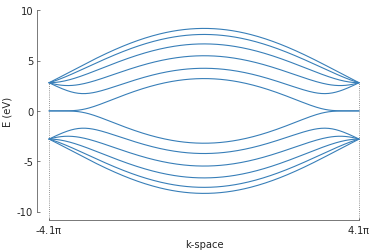

In [43]:
from math import pi, sqrt

solver = pb.solver.lapack(model)
a = graphene.a_cc * sqrt(3)  # ribbon unit cell length
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()

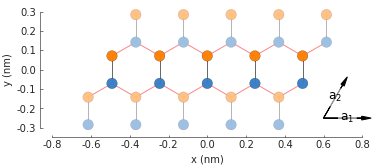

In [44]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),  # nm
    pb.translational_symmetry(a1=False, a2=True)
)
model.plot()
model.lattice.plot_vectors(position=[0.6, -0.25])  # nm

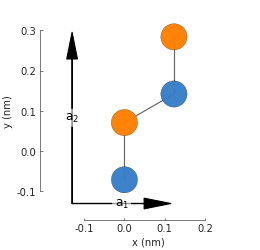

In [45]:
model = pb.Model(graphene.monolayer_4atom())
model.plot()
model.lattice.plot_vectors(position=[-0.13, -0.13])


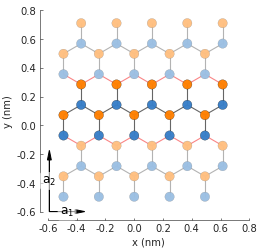

In [46]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.primitive(a1=5),
    pb.translational_symmetry(a1=False, a2=True)
)
model.plot()
model.lattice.plot_vectors(position=[-0.59, -0.6])

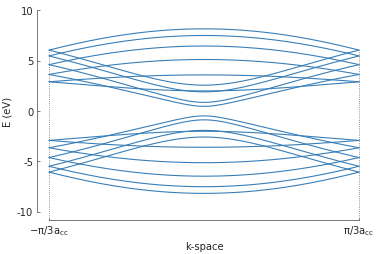

In [47]:
solver = pb.solver.lapack(model)
d = 3 * graphene.a_cc  # ribbon unit cell length
bands = solver.calc_bands([0, -pi/d], [0, pi/d])
bands.plot(point_labels=['$-\pi / 3 a_{cc}$', '$\pi / 3 a_{cc}$'])

# 5.2. 1D periodic supercell

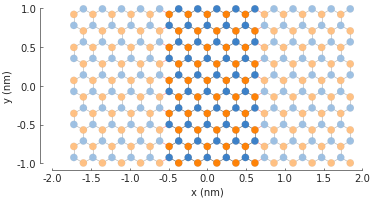

In [48]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(x=2, y=2),
    pb.translational_symmetry(a1=1.2, a2=False)
)
model.plot()


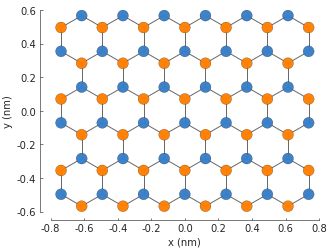

In [49]:
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(x=1.5, y=1.5),  # don't combine a small shape
    pb.translational_symmetry(a1=1.7, a2=False)  # with large period length
)
model.plot()

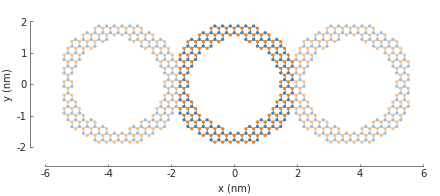

In [50]:
def ring(inner_radius, outer_radius):
    """Ring shape defined by an inner and outer radius"""
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)
    return pb.FreeformShape(contains, width=[2*outer_radius, 2*outer_radius])

model = pb.Model(
    graphene.monolayer_4atom(),
    ring(inner_radius=1.4, outer_radius=2),
    pb.translational_symmetry(a1=3.8, a2=False)
)
plt.figure(figsize=[8, 3])
model.plot()

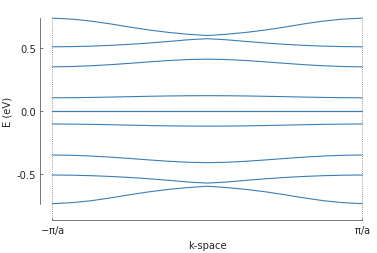

In [51]:
solver = pb.solver.arpack(model, k=10) # only the 10 lowest states
a = 3.8  # [nm] unit cell length
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot(point_labels=['$-\pi / a$', '$\pi / a$'])

# 5.3. 2D periodic supercell

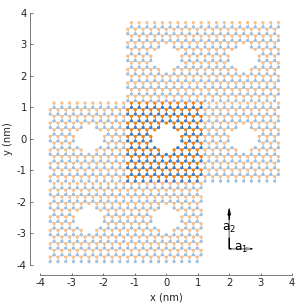

In [52]:
width = 2.5
rectangle = pb.rectangle(x=width * 1.2, y=width * 1.2)
dot = pb.circle(radius=0.4)

model = pb.Model(
    graphene.monolayer_4atom(),
    rectangle - dot,
    pb.translational_symmetry(a1=width, a2=width)
)
plt.figure(figsize=(5, 5))
model.plot()
model.lattice.plot_vectors(position=[2, -3.5], scale=3)

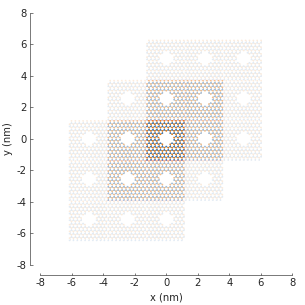

In [53]:
plt.figure(figsize=(5, 5))
model.plot(num_periods=2)

# 5.4. Example

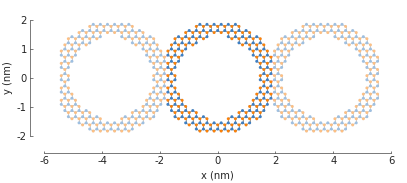

In [54]:
"""Model an infinite nanoribbon consisting of graphene rings"""
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi

pb.pltutils.use_style()


def ring(inner_radius, outer_radius):
    """A simple ring shape"""
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)

    return pb.FreeformShape(contains, width=[2 * outer_radius, 2 * outer_radius])


model = pb.Model(
    graphene.monolayer_4atom(),
    ring(inner_radius=1.4, outer_radius=2),  # length in nanometers
    pb.translational_symmetry(a1=3.8, a2=False)  # period in nanometers
)

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
model.plot()
plt.show()

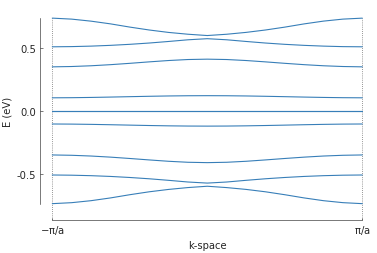

In [55]:
# only solve for the 10 lowest energy eigenvalues
solver = pb.solver.arpack(model, k=10)
a = 3.8  # [nm] unit cell length
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot(point_labels=[r'$-\pi / a$', r'$\pi / a$'])
plt.show()

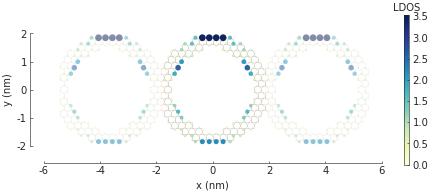

In [56]:
solver.set_wave_vector(k=0)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # LDOS around 0 eV

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

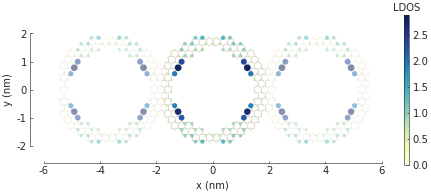

In [57]:
solver.set_wave_vector(k=pi/a)
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # LDOS around 0 eV

plt.figure(figsize=pb.pltutils.cm2inch(20, 7))
ldos.plot(site_radius=(0.03, 0.12))
pb.pltutils.colorbar(label="LDOS")
plt.show()

# 6. Fields and effects

# 6.1. Electric potential

In [58]:
@pb.onsite_energy_modifier
def potential(x, y):
    return np.sin(x)**2 + np.cos(y)**2

In [59]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(12),
    potential
)

/home/2015/2015550024/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


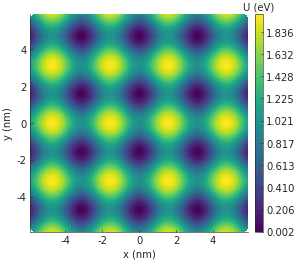

In [60]:
model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")

/home/2015/2015550024/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


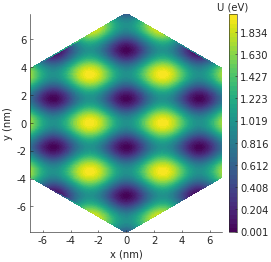

In [61]:
def wavy(a, b):
    @pb.onsite_energy_modifier
    def potential(x, y):
        return np.sin(a * x)**2 + np.cos(b * y)**2
    return potential

model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=6, radius=8),
    wavy(a=0.6, b=0.9)
)
model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")

In [62]:
def wavy2(a, b):
    @pb.onsite_energy_modifier
    def potential(energy, x, y):
        v = np.sin(a * x)**2 + np.cos(b * y)**2
        return energy + v
    return potential

/home/2015/2015550024/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


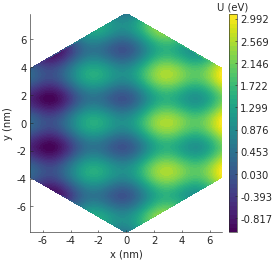

In [63]:
e Brillouin
zone.
Naturally, in real materials electrons are neither completely
localised nor completely free, but you can still see those
characteristics in genuine band structures.def linear(k):
    @pb.onsite_energy_modifier
    def potential(energy, x):
        return energy + k*x
    return potential

model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=6, radius=8),
    wavy2(a=0.6, b=0.9),
    linear(k=0.2)
)
model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")

# 6.2. About the decorator

In [64]:
@pb.onsite_energy_modifier
def potential(energy, x, y, z, sub_id):
    return ... # some function of the arguments

In [65]:
￼@pb.onsite_energy_modifier
def potential(x, y, energy, sub_id):
    return ... # some function

SyntaxError: invalid character in identifier (<ipython-input-65-7483a5beb324>, line 1)

# 6.3. Opening a band gap

In [66]:

def mass_term(delta):
    """Break sublattice symmetry with opposite A and B onsite energy"""
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == 'A'] += delta
        energy[sub_id == 'B'] -= delta
        return energy
    return potential

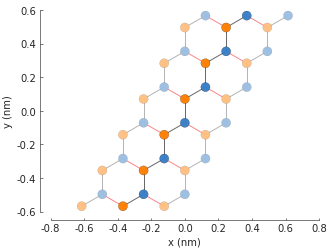

In [67]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True, a2=False)
)
model.plot()

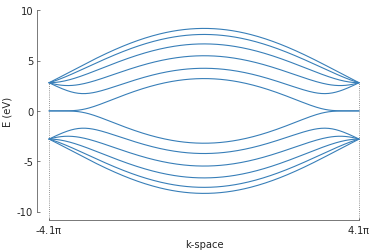

In [68]:
from math import pi, sqrt

solver = pb.solver.lapack(model)
a = graphene.a_cc * sqrt(3)
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()

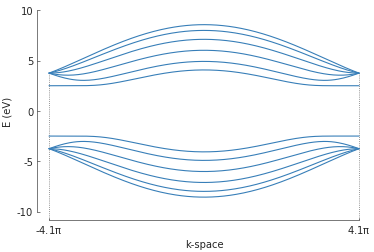

In [69]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True, a2=False),
    mass_term(delta=2.5)  # eV
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()

In [70]:
def pn_junction(y0, v1, v2):
    @pb.onsite_energy_modifier
    def potential(energy, y):
        energy[y < y0] += v1
        energy[y >= y0] += v2
        return energy
    return potential

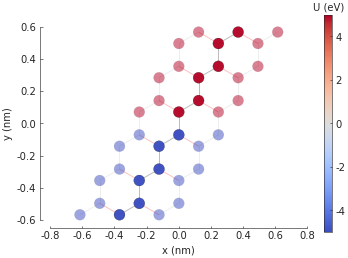

In [71]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True, a2=False),
    pn_junction(y0=0, v1=-5, v2=5)
)
model.onsite_map.plot(cmap="coolwarm", site_radius=0.04)
pb.pltutils.colorbar(label="U (eV)")

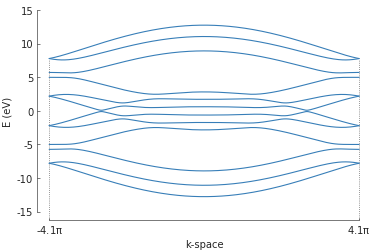

In [72]:
solver = pb.solver.lapack(model)
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()

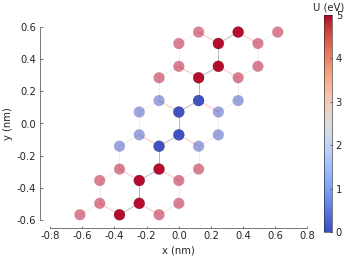

In [73]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True, a2=False),
    pn_junction(y0=-0.2, v1=5, v2=0),
    pn_junction(y0=0.2, v1=0, v2=5)
)
model.onsite_map.plot(cmap="coolwarm", site_radius=0.04)
pb.pltutils.colorbar(label="U (eV)")

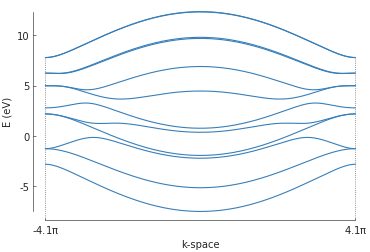

In [74]:
solver = pb.solver.lapack(model)
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()

# 6.5. Magnetic field

In [75]:
from pybinding.constants import phi0

def constant_magnetic_field(B):
    @pb.hopping_energy_modifier
    def function(energy, x1, y1, x2, y2):
        # the midpoint between two sites
        y = 0.5 * (y1 + y2)
        # scale from nanometers to meters
        y *= 1e-9

        # vector potential along the x-axis
        A_x = B * y

        # integral of (A * dl) from position 1 to position 2
        peierls = A_x * (x1 - x2)
        # scale from nanometers to meters (because of x1 and x2)
        peierls *= 1e-9

        # the Peierls substitution
        return energy * np.exp(1j * 2*pi/phi0 * peierls)
    return function

In [76]:
@pb.hopping_energy_modifier
def function(energy, x1, y1, z1, x2, y2, z2, hop_id):
    return ... # some function of the arguments

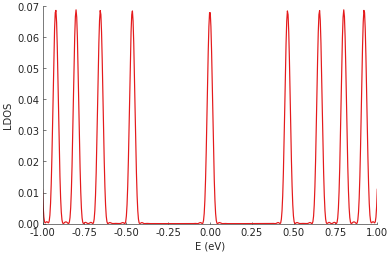

In [77]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(30),
    constant_magnetic_field(B=200)  # Tesla
)
kpm = pb.kpm(model)

ldos = kpm.calc_ldos(energy=np.linspace(-1, 1, 500), broadening=0.015, position=[0, 0])
ldos.plot()
plt.show()

# 6.7. Example


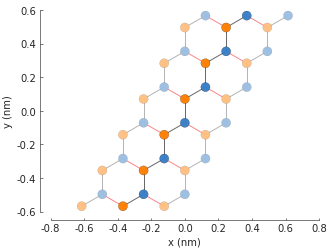

In [78]:
"""PN junction and broken sublattice symmetry in a graphene nanoribbon"""
import pybinding as pb
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt

pb.pltutils.use_style()


def mass_term(delta):
    """Break sublattice symmetry with opposite A and B onsite energy"""
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == 'A'] += delta
        energy[sub_id == 'B'] -= delta
        return energy

    return potential


def pn_juction(y0, v1, v2):
    """PN junction potential

    The `y0` argument is the position of the junction, while `v1` and `v2`
    are the values of the potential (in eV) before and after the junction.
    """
    @pb.onsite_energy_modifier
    def potential(energy, y):
        energy[y < y0] += v1
        energy[y >= y0] += v2
        return energy

    return potential


model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(1.2),  # width in nanometers
    pb.translational_symmetry(a1=True, a2=False),
    mass_term(delta=2.5),  # eV
    pn_juction(y0=0, v1=-2.5, v2=2.5)  # y0 in [nm] and v1, v2 in [eV]
)
model.plot()
plt.show()

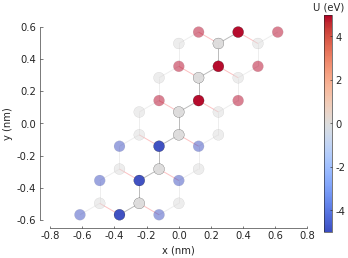

In [79]:
# plot the potential: note that pn_junction cancels out delta on some sites
model.onsite_map.plot(cmap="coolwarm", site_radius=0.04)
pb.pltutils.colorbar(label="U (eV)")
plt.show()

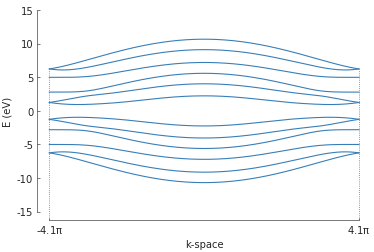

In [80]:
# compute the bands
solver = pb.solver.lapack(model)
a = graphene.a_cc * sqrt(3)  # nanoribbon unit cell length
bands = solver.calc_bands(-pi/a, pi/a)
bands.plot()
plt.show()

# 7. Defects and strain

# 7.1. Vacancies

In [81]:
def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

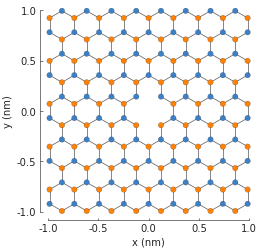

In [82]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(2),
    vacancy(position=[0, 0], radius=0.1)
)
model.plot()

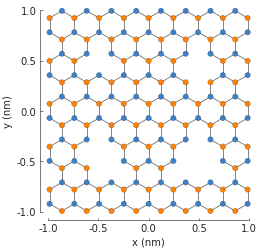

In [83]:
model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(2),
    vacancy(position=[-0.50,  0.50], radius=0.1),
    vacancy(position=[ 0.50,  0.45], radius=0.15),
    vacancy(position=[-0.45, -0.45], radius=0.15),
    vacancy(position=[ 0.50, -0.50], radius=0.2),
)
model.plot()

# 7.2. Layer defect

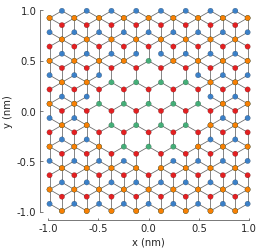

In [84]:
def scrape_top_layer(position, radius):
    """Remove the top layer of graphene in the area specified by position and radius"""
    @pb.site_state_modifier
    def modifier(state, x, y, sub_id):
        x0, y0 = position
        is_within_radius = (x-x0)**2 + (y-y0)**2 < radius**2
        is_top_layer = np.logical_or(sub_id == 'A1', sub_id == 'B1')
        final_condition = np.logical_and(is_within_radius, is_top_layer)
        state[final_condition] = False
        return state
    return modifier

model = pb.Model(
    graphene.bilayer(),
    pb.rectangle(2),
    scrape_top_layer(position=[0, 0], radius=0.5)
)
model.plot()

In [85]:
def scrape_top_layer_alt(position, radius):
    """Alternative definition of `scrape_top_layer`"""
    @pb.site_state_modifier
    def modifier(state, x, y, z):
        x0, y0 = position
        is_within_radius = (x-x0)**2 + (y-y0)**2 < radius**2
        is_top_layer = (z == 0)
        final_condition = np.logical_and(is_within_radius, is_top_layer)
        state[final_condition] = False
        return state
    return modifier

# 7.3. Strain

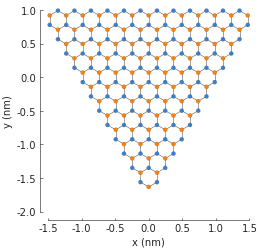

In [86]:
from math import pi

model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=3, radius=2, angle=pi),
)
model.plot()


In [87]:
def triaxial_displacement(c):
    @pb.site_position_modifier
    def displacement(x, y, z):
        ux = 2*c * x*y
        uy = c * (x**2 - y**2)
        return x + ux, y + uy, z
    return displacement

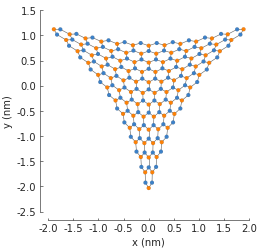

In [88]:
model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=3, radius=2, angle=pi),
    triaxial_displacement(c=0.15)
)
model.plot()

In [89]:
np.all(model.hamiltonian.data == -2.8)

True

In [90]:
@pb.hopping_energy_modifier
def strained_hopping(energy, x1, y1, z1, x2, y2, z2):
    d = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    beta = 3.37
    w = d / graphene.a_cc - 1
    return energy * np.exp(-beta*w)

In [91]:
model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=3, radius=2, angle=pi),
    triaxial_displacement(c=0.15),
    strained_hopping
)

In [92]:
np.all(model.hamiltonian.data == -2.8)

False

In [93]:
def triaxial_strain(c, beta=3.37):
    """Produce both the displacement and hopping energy modifier"""
    @pb.site_position_modifier
    def displacement(x, y, z):
        ux = 2*c * x*y
        uy = c * (x**2 - y**2)
        return x + ux, y + uy, z

    @pb.hopping_energy_modifier
    def strained_hopping(energy, x1, y1, z1, x2, y2, z2):
        l = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
        w = l / graphene.a_cc - 1
        return energy * np.exp(-beta*w)

    return displacement, strained_hoppingstand how to solve your own projects.
Make a list of things you don't understand so you can ask it to me at the beginning of next class.
 

I will share project specific material here and on github today and in the coming days. Keep an eye on it.

 

SyntaxError: invalid syntax (<ipython-input-93-243f88882668>, line 15)

In [94]:
model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=3, radius=40, angle=pi),
    triaxial_strain(c=0.0025)
)
kpm = pb.kpm(model)

for sub_name in ['A', 'B']:
    ldos = kpm.calc_ldos(energy=np.linspace(-1, 1, 500), broadening=0.03,
                         position=[0, 0], sublattice=sub_name)
    ldos.plot(label=sub_name, ls="--" if sub_name == "B" else "-")
pb.pltutils.legend()

NameError: name 'triaxial_strain' is not defined

# 7.5. Example

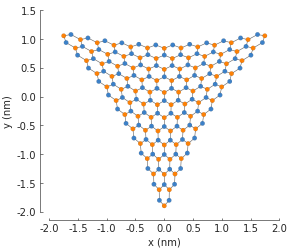

In [95]:
"""Strain a triangular system by pulling on its vertices"""
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi

pb.pltutils.use_style()


def triaxial_strain(c):
    """Strain-induced displacement and hopping energy modification"""
    @pb.site_position_modifier
    def displacement(x, y, z):
        ux = 2*c * x*y
        uy = c * (x**2 - y**2)
        return x + ux, y + uy, z

    @pb.hopping_energy_modifier
    def strained_hopping(energy, x1, y1, z1, x2, y2, z2):
        l = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
        w = l / graphene.a_cc - 1
        return energy * np.exp(-3.37 * w)

    return displacement, strained_hopping


model = pb.Model(
    graphene.monolayer(),
    pb.regular_polygon(num_sides=3, radius=2, angle=pi),
    triaxial_strain(c=0.1)
)
model.plot()
plt.show()

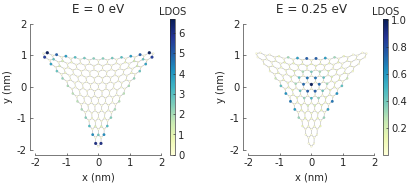

In [96]:
plt.figure(figsize=(7, 2.5))
grid = plt.GridSpec(nrows=1, ncols=2)
for block, energy in zip(grid, [0, 0.25]):
    plt.subplot(block)
    plt.title("E = {} eV".format(energy))

    solver = pb.solver.arpack(model, k=30, sigma=energy)
    ldos_map = solver.calc_spatial_ldos(energy=energy, broadening=0.03)
    ldos_map.plot()
    pb.pltutils.colorbar(label="LDOS")

plt.show()

# 8. Eigenvalue solvers

# 8.3. Solver interface

In [97]:
from pybinding.repository import graphene

In [98]:
model = pb.Model(graphene.monolayer())

In [99]:
 model.hamiltonian.todense()

matrix([[ 0. , -2.8],
        [-2.8,  0. ]], dtype=float32)

In [100]:
solver = pb.solver.lapack(model)

In [101]:
solver.eigenvalues

array([-2.8,  2.8], dtype=float32)

In [102]:
solver.eigenvectors

array([[-0.70710677, -0.70710677],
       [-0.70710677,  0.70710677]], dtype=float32)

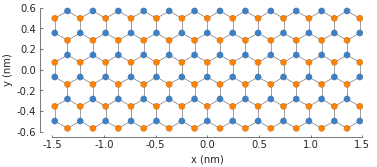

In [103]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(x=3, y=1.2)
)
model.plot()

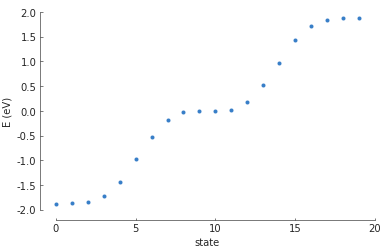

In [104]:
solver = pb.solver.arpack(model, k=20)  # for the 20 lowest energy eigenvalues
eigenvalues = solver.calc_eigenvalues()
eigenvalues.plot()

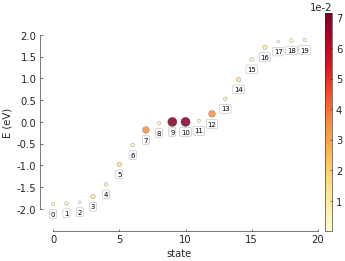

In [105]:
eigenvalues = solver.calc_eigenvalues(map_probability_at=[0.1, 0.6])  # position in [nm]
eigenvalues.plot_heatmap(show_indices=True)
pb.pltutils.colorbar()

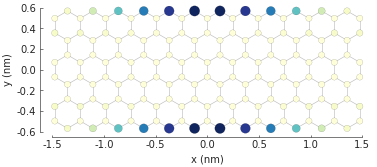

In [106]:
probability_map = solver.calc_probability(9)
probability_map.plot()

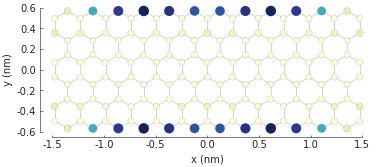

In [107]:
ldos_map = solver.calc_spatial_ldos(energy=0, broadening=0.05)  # [eV]
ldos_map.plot()

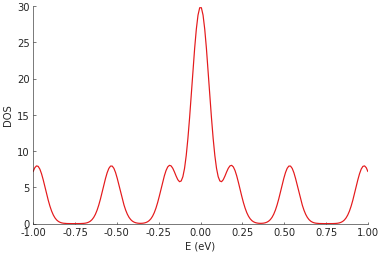

In [108]:
dos = solver.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dos.plot()


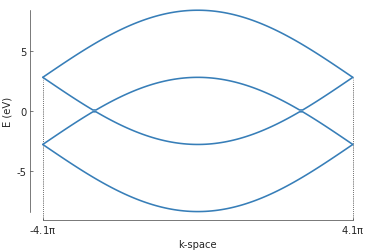

In [109]:

from math import pi

model = pb.Model(
    graphene.monolayer(),
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)

kx_lim = pi / graphene.a
kx_path = np.linspace(-kx_lim, kx_lim, 100)
ky_outer = 0
ky_inner = 2*pi / (3*graphene.a_cc)

outer_bands = []
for kx in kx_path:
    solver.set_wave_vector([kx, ky_outer])
    outer_bands.append(solver.eigenvalues)

inner_bands = []
for kx in kx_path:
    solver.set_wave_vector([kx, ky_inner])
    inner_bands.append(solver.eigenvalues)

for bands in [outer_bands, inner_bands]:
    result = pb.results.Bands(kx_path, bands)
    result.plot()

# 9.2. Builtin methods

In [110]:
model = pb.Model(...)
kpm = pb.kpm(model)
# ... use kpm

AttributeError: 'ellipsis' object has no attribute 'impl'

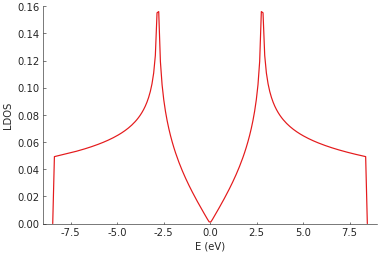

In [111]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer(), pb.rectangle(60, 60))
kpm = pb.kpm(model)

ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])
ldos.plot()

In [112]:
ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05,
                     position=[0, 0], sublattice="B")


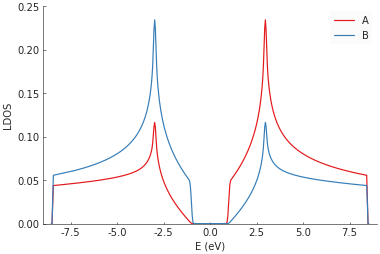

In [113]:
model = pb.Model(
    graphene.monolayer(),
    graphene.mass_term(1),
    pb.rectangle(60)
)
kpm = pb.kpm(model)

for sub_name in ["A", "B"]:
    ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 500), broadening=0.05,
                         position=[0, 0], sublattice=sub_name)
    ldos.plot(label=sub_name)
pb.pltutils.legend()

# 9.2.2. DOS

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


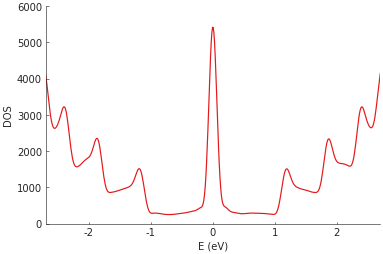

In [114]:
model = pb.Model(graphene.monolayer(), pb.rectangle(400, 2))
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-2.7, 2.7, 500), broadening=0.06, num_random=16)
dos.plot()

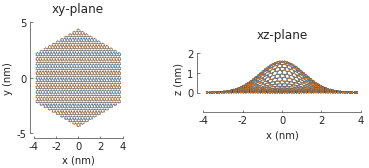

In [115]:
def gaussian_bump_strain(height, sigma):
    """Out-of-plane deformation (bump)"""
    @pb.site_position_modifier
    def displacement(x, y, z):
        dz = height * np.exp(-(x**2 + y**2) / sigma**2)  # gaussian
        return x, y, z + dz  # only the height changes

    @pb.hopping_energy_modifier
    def strained_hoppings(energy, x1, y1, z1, x2, y2, z2):
        d = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)  # strained neighbor distance
        return energy * np.exp(-3.37 * (d / graphene.a_cc - 1))  # see strain section

    return displacement, strained_hoppings

model = pb.Model(graphene.monolayer().with_offset([-graphene.a / 2, 0]),
                 pb.regular_polygon(num_sides=6, radius=4.5),
                 gaussian_bump_strain(height=1.6, sigma=1.6))

plt.figure(figsize=(6.7, 2.2))
plt.subplot(121, title="xy-plane", ylim=[-5, 5])
model.plot()
plt.subplot(122, title="xz-plane")
model.plot(axes="xz")

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


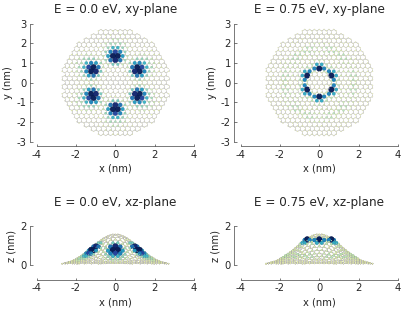

In [116]:
kpm = pb.kpm(model)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape=pb.circle(radius=2.8))  # only within the shape
plt.figure(figsize=(6.7, 6))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 0.75, 0.0, 0.75]  # eV
planes = ["xy", "xy", "xz", "xz"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)

In [117]:
g_ij = kpm.calc_greens(i, j, energy=np.linspace(-9, 9, 100), broadening=0.1)

NameError: name 'i' is not defined

# 10. Scattering model# 

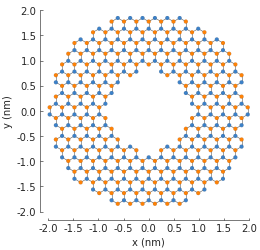

In [118]:
from pybinding.repository import graphene

def ring(inner_radius, outer_radius):
    """A simple ring shape"""
    def contains(x, y, z):
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r, r < outer_radius)
    return pb.FreeformShape(contains, width=[2*outer_radius, 2*outer_radius])

model = pb.Model(graphene.monolayer(), ring(0.8, 2))
model.plot()

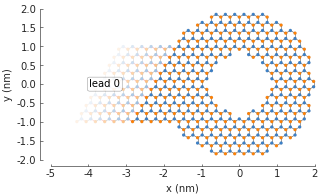

In [119]:
model.attach_lead(direction=-1, contact=pb.line([-2, -1], [-2, 1]))

plt.figure(figsize=(6, 3))  # make the figure wider
model.plot()

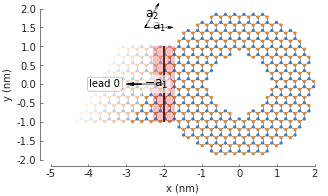

In [120]:
plt.figure(figsize=(6, 3))  # make the figure wider
model.plot()
model.leads[0].plot_contact()  # red shaded area and arrow
model.lattice.plot_vectors(position=[-2.5, 1.5], scale=3)

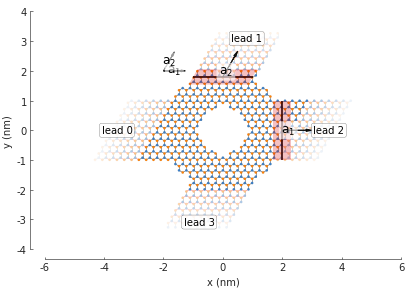

In [121]:
model.attach_lead(direction=+2, contact=pb.line([-1,  1.8], [1,  1.8]))
model.attach_lead(direction=+1, contact=pb.line([ 2, -1  ], [2,  1  ]))
model.attach_lead(direction=-2, contact=pb.line([-1, -1.8], [1, -1.8]))

plt.figure(figsize=(6.9, 6))
model.plot()
model.leads[1].plot_contact()
model.leads[2].plot_contact()
model.lattice.plot_vectors(position=[-2, 2], scale=3)

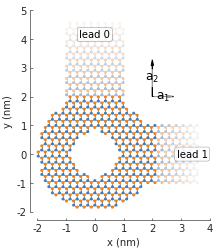

In [122]:
model = pb.Model(graphene.monolayer_4atom(), ring(0.8, 2))
model.attach_lead(direction=+2, contact=pb.line([-1,  1.8], [1, 1.8]))
model.attach_lead(direction=+1, contact=pb.line([ 2, -1  ], [2, 1  ]))
model.plot()
model.lattice.plot_vectors(position=[2, 2], scale=3)


# 10.2. Lead attributes


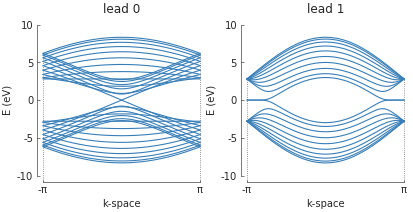

In [123]:
plt.figure(figsize=(6.7, 3))
plt.subplot('121')
model.leads[0].plot_bands()
plt.subplot('122')
model.leads[1].plot_bands()

# 10.3. Fields in the leads

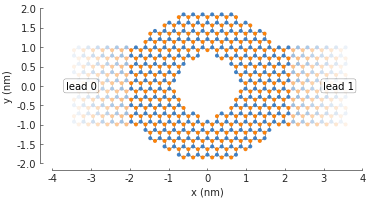

In [124]:
def pn_junction(x0, v1, v2):
    @pb.onsite_energy_modifier
    def potential(energy, x):
        energy[x < x0] += v1
        energy[x >= x0] += v2
        return energy
    return potential

model = pb.Model(
    graphene.monolayer_4atom(),
    ring(0.8, 2),
    pn_junction(x0=0, v1=-1, v2=1)
)
model.attach_lead(direction=-1, contact=pb.line([-2, -1], [-2,  1]))
model.attach_lead(direction=+1, contact=pb.line([ 2, -1], [ 2,  1]))
model.plot()

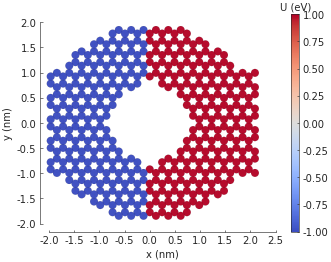

In [125]:
model.onsite_map.plot(cmap="coolwarm", site_radius=0.06)
pb.pltutils.colorbar(label="U (eV)")

(-10, 10)

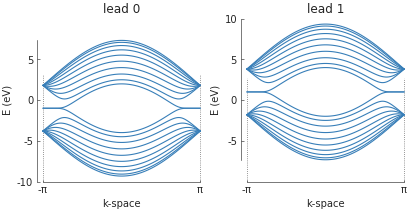

In [126]:
plt.figure(figsize=(6.7, 3))
plt.subplot('121')
model.leads[0].plot_bands()
plt.ylim(-10, 10)
plt.subplot('122')
model.leads[1].plot_bands()
plt.ylim(-10, 10)